In [287]:
# Физика твердого тела.
# Определить силовые постоянные вдоль направления [100] для Аl, Fe, Cu, Pb
# Построить спектр фононов вдоль этого 

# Выполнила Касапенко Наталья, Б02-927

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Параметры функции: 
#      a - постоянная решетки
#      N_atoms - количество атомов в системе
#      N_layers - количество слоев атомов в системе
#      N - количество атомов в слое
#      m - масса атома (г/моль - единицы metal LAMMPS)
#      file_name - название считываемого файла

def func(a, N_atoms, N_layers, N, m, file_name):
    
    #Все величины измеряются в единицах metal из LAMMPS
    
    Cp = []
    # fs измеряется в eV/angstrem
    fs = 0
    
    # величина смещения 0.05 - в едеиницах решетки => еще умножаем на a * 5
    const = 0.05 * a * 5

    # Величина вектора k должна лежать в диапазоне от -pi/a до pi/a

    data = pd.read_csv(file_name, delimiter=' ',header = None, index_col=0)

    #Определение силовых постоянных
    for p in range(N_layers):
        if (p != 4):
            for i in range(N_atoms):
                if (data.iloc[i,1] * 10 == p):
                    fs = fs + data.iloc[i, 4]/const
            Cp.append(fs/N)
            fs = 0
            
    # Cp в эВ/ангстрем^2
    Cp_av = []
    Cp_av.append((Cp[3] + Cp[4])/2)
    Cp_av.append((Cp[2] + Cp[5])/2)
    Cp_av.append((Cp[1] + Cp[6])/2)
    Cp_av.append((Cp[0] + Cp[7])/2)
    Cp_av.append(Cp[8])
    
    # Cпектр фононов
    w = []
    k = []
    temp = 0
    r = 0
    k_scaled = []

    k = np.linspace(math.pi/a, -math.pi/a, 100)
    k_scaled = np.linspace(1, -1, 100)
    for counter in range(100):
        r = k[counter]
        
        temp = 0
        for i in range(5):
            temp = temp + Cp_av[i] * (1 - math.cos((i+1) * r * a))
            
        w.append(math.sqrt( 2 * temp / m))
    return Cp, Cp_av, k, k_scaled, w  

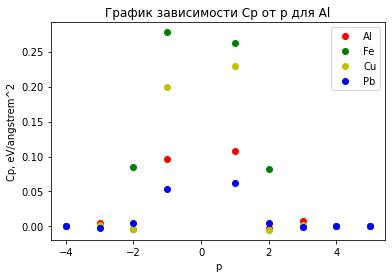

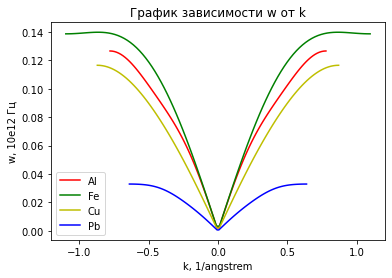

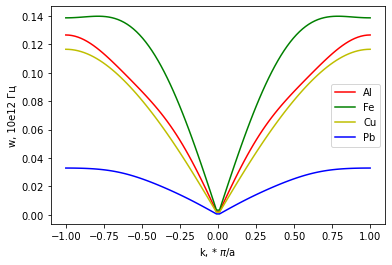

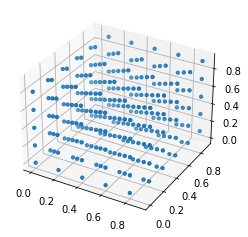

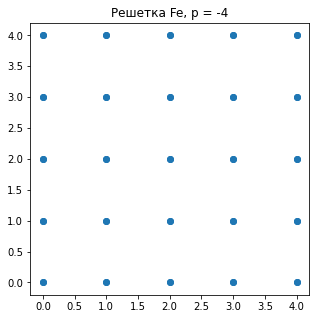

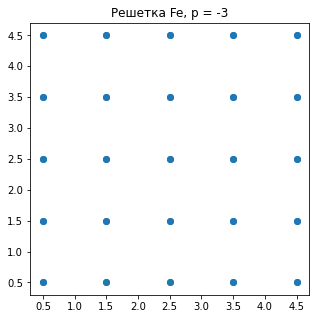

In [303]:
import matplotlib.pyplot as plt 
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Cp_Al, Cp_av_Al, k_Al, k_Al_scaled, w_Al = func(4.04, 500, 10, 50, 26.98, "dump_Al.txt")
Cp_Fe, Cp_av_Fe, k_Fe, k_Fe_scaled, w_Fe = func(2.866, 250, 10, 25, 55.845, "dump_Fe.txt")
Cp_Cu, Cp_av_Cu, k_Cu, k_Cu_scaled, w_Cu = func(3.615, 500, 10, 50, 63.546, "dump_Cu.txt")
Cp_Pb, Cp_av_Pb, k_Pb, k_Pb_scaled, w_Pb = func(4.924, 500, 10, 50, 207.2, "dump_Pb.txt")

p = [-4, -3, -2, -1, 1, 2, 3, 4, 5]

fig, ax = plt.subplots() 
ax.set_xlabel('p')
ax.set_ylabel('Cp, eV/angstrem^2')
ax.plot(p, Cp_Al, 'ro', color = 'r', label = 'Al')
ax.plot(p, Cp_Fe, 'ro', color = 'g', label = 'Fe')
ax.plot(p, Cp_Cu, 'ro', color = 'y', label = 'Cu')
ax.plot(p, Cp_Pb, 'ro', color = 'b', label = 'Pb')
ax.legend()
ax.set_title('График зависимости Cp от p для Al')
plt.savefig('Cp_p.pdf')

fig, ax1 = plt.subplots() 
ax1.set_xlabel('k, 1/angstrem')
ax1.set_ylabel('w, 10e12 Гц')
ax1.plot(k_Al, w_Al, color = 'r', label = 'Al')
ax1.plot(k_Fe, w_Fe,color = 'g', label = 'Fe')
ax1.plot(k_Cu, w_Cu, color = 'y', label = 'Cu')
ax1.plot(k_Pb, w_Pb, color = 'b', label = 'Pb')
ax1.legend()
ax1.set_title('График зависимости w от k')
plt.savefig('w_k.pdf')

fig, ax2 = plt.subplots() 
ax2.set_xlabel('k, * $\pi$/a')
ax2.set_ylabel('w, 10e12 Гц')
ax2.plot(k_Al_scaled, w_Al, color = 'r', label = 'Al') 
ax2.plot(k_Fe_scaled, w_Fe, color = 'g', label = 'Fe')
ax2.plot(k_Cu_scaled, w_Cu, color = 'y', label = 'Cu')
ax2.plot(k_Pb_scaled, w_Pb, color = 'b', label = 'Pb')
ax2.legend()
ax1.set_title('График зависимости w от k')
plt.savefig('w_k_scaled.pdf')

data = pd.read_csv("dump_Fe.txt", delimiter=' ',header = None, index_col=0)
x = data[2]
y = data[3]
z = data[4]
y_1 = []
y_2 = []
z_1 = []
z_2 = []
for i in range(500):
        if (data.iloc[i, 1] * 10 == 0):
            y_1.append(data.iloc[i, 2] * 5)
            z_1.append(data.iloc[i, 3] * 5)
            
        if (data.iloc[i, 1] * 10 == 1):
            y_2.append(data.iloc[i, 2] * 5)
            z_2.append(data.iloc[i, 3] * 5)            
            
s = np.random.randint(10, 100, len(x))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=10)


# Построим два первых среза
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(y_1, z_1)
plt.xlabel("")
plt.ylabel("")
plt.title("Решетка Fe, p = -4")
plt.savefig('Fe_first.pdf')
plt.show()


fig, ax2 = plt.subplots(figsize=(5, 5))
ax2.scatter(y_2, z_2)
plt.xlabel("")
plt.ylabel("")
plt.title("Решетка Fe, p = -3")
plt.savefig('Fe_second.pdf')
plt.show()